<a href="https://colab.research.google.com/github/PSY21801028/SYPark-HGU/blob/main/AI_04011_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
input_img = Input(shape=(784,)) #784 = 28x28
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)

In [77]:
#need to re-define input layer for decoder input
encoded_input = Input(shape=(encoding_dim,))
decoded = Dense(784, activation='sigmoid')(encoded_input)
decoder = Model(encoded_input, decoded)

In [78]:
outputs = decoder(encoder(input_img))
autoencoder = Model(input_img, outputs)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [79]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = y_train.astype('float32') / 255.
y_test = y_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
autoencoder.fit(x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 7s 5ms/step - loss: 0.2778 - val_loss: 0.1911
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1719 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1444 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1292 - val_loss: 0.1222
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1193 - val_loss: 0.1140
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1121 - val_loss: 0.1078
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1066 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1027 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0998 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0977 - val_loss: 0.0956

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


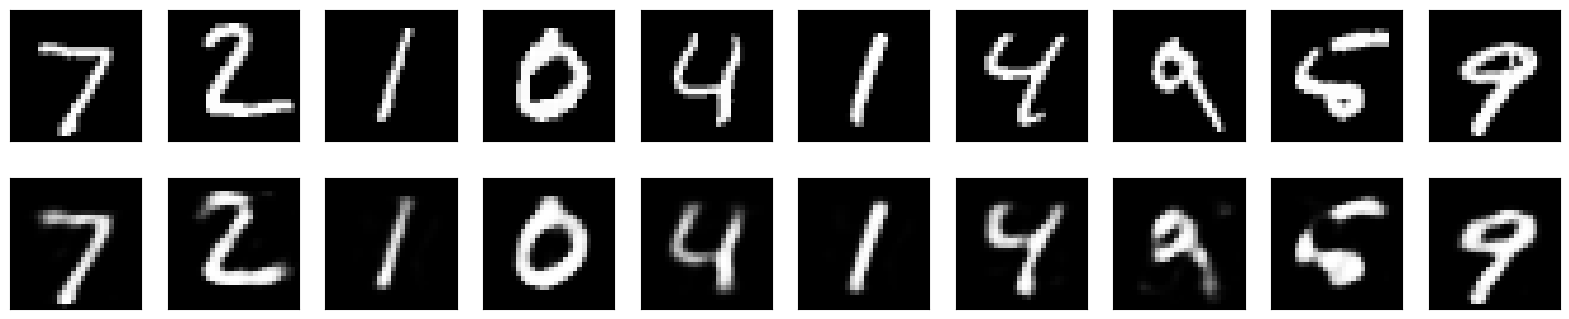

In [7]:
import matplotlib.pyplot as plt
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

#AE Implementation (CNN)

In [80]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
def preprocess(array):
  """
  Normalizes the supplied array and reshapes it into the appropriate format.
  """
  array = array.astype("float32") / 255.0
  array = np.reshape(array, (len(array), 28, 28, 1))
  return array

In [10]:
(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [39]:
input = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 14, 14, 32)       924

In [37]:
autoencoder.fit(
  x=train_data,
  y=train_data,
  epochs=50,
  batch_size=128,
  shuffle=True,
  validation_data=(test_data, test_data),
)

Epoch 1/50


ValueError: ignored

313/313 [==============================] - 1s 1ms/step


ValueError: ignored

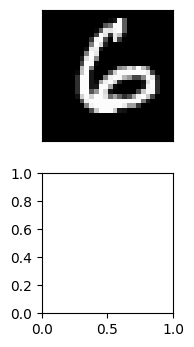

In [36]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

# noise add

In [14]:
def noise(array):
  """
  Adds random noise to each image in the supplied array.
  """
  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
  loc=0.0, scale=1.0, size=array.shape
  )
  return np.clip(noisy_array, 0.0, 1.0)

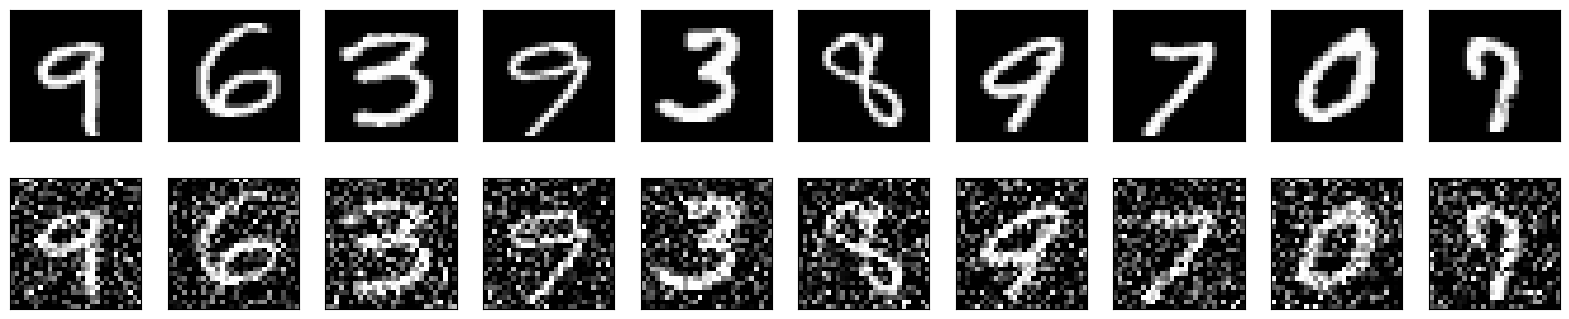

In [15]:
(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)
# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)
# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [18]:
autoencoder.fit(
  x=noisy_train_data,
  y=train_data,
  epochs=100,
  batch_size=128,
  shuffle=True,
  validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0854 - val_loss: 0.0849
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0853 - val_loss: 0.0849
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0853 - val_loss: 0.0849
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0853 - val_loss: 0.0848
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0852 - val_loss: 0.0848
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0852 - val_loss: 0.0848
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0852 - val_loss: 0.0849
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0852 - val_loss: 0.0847
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0852 - val_loss: 0.0847
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0851 - val_lo

313/313 [==============================] - 1s 2ms/step


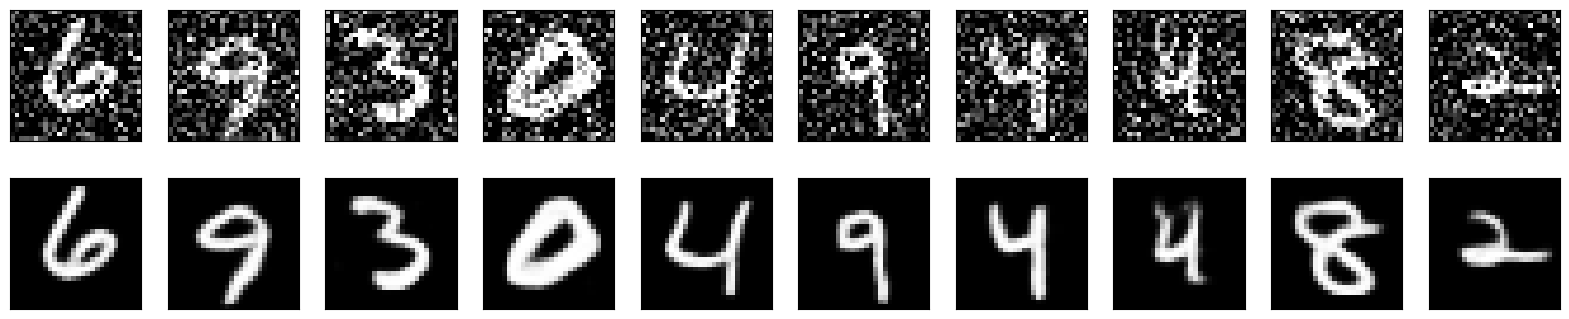

In [19]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

In [59]:
input = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
encoder = Model(input, x)

# Decoder
y = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
y = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(y)
y = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(y)
decoder = Model(x,y)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
Total params: 9,568
Trainable params: 9,568
Non-trainable 

# 23.04.11 - VAE

In [60]:
predictions = encoder.predict(test_data)
print(predictions.shape)
reshaped = predictions.reshape((predictions.shape[0],1568))
print(reshaped.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 7, 7, 32)
(10000, 1568)


In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(reshaped)
print(reduced_data.shape)

(10000, 2)


ValueError: ignored

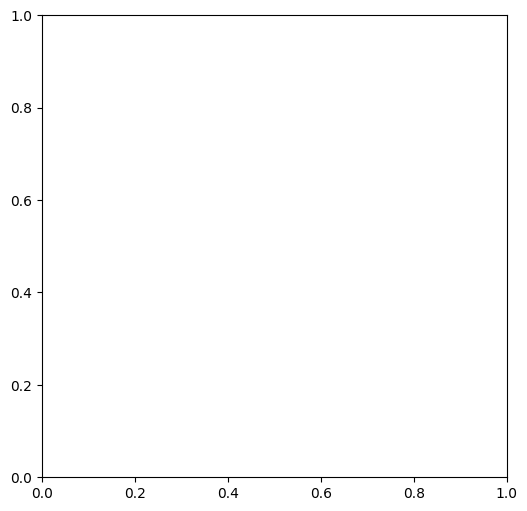

In [73]:
plt.figure(figsize=(6,6))
plt.scatter(reduced_data[:0], reduced_data[:1], c=y_test, cmap = 'gist_rainbow')
plt.colorbar()
plt.show()

In [81]:
prediction_noisy = encoder.predict(noisy_test_data)
prediction_noisy = prediction_noisy.reshape((prediction_noisy.shape[0], 1568))
reduced_noisy = pca.transform(prediction_noisy)
plt.figure(figsize=(6,6))
plt.scatter(reduced_data[:0], reduced_data[:1], c=y_test, cmap = 'gist_rainbow')
plt.colorbar()
plt.show()

ValueError: ignored

# New keras

In [85]:
from tensorflow import keras
from tensorflow.keras import layers

original_dim = 28*28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [86]:
from keras import backend as K

def sampling(args):
  z_mean, z_log_sigma = args
  epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
  return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [88]:
#Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

#Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

#instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [89]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
vae.fit(x_train, x_train,
        epoch=100,
        batch_size=32,
        validation_data=(x_test, x_test))